In [28]:
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from keras.activations import relu, linear, sigmoid
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [29]:
mnist = load_digits()
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Check the images of the dataset

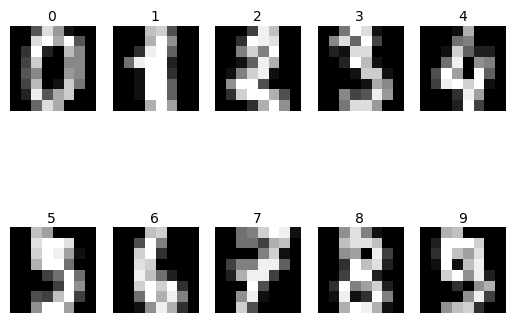

In [30]:
fig, axs = plt.subplots(2,5)
for i in range(2):
    for j in range(5):
        index = 5*i + j
        axs[i, j].axis('off')
        axs[i, j].text(3,-1,f'{index}')
        axs[i, j].imshow(mnist.images[index], cmap='gray')

In [31]:
x = mnist.data
y = mnist.target

check the whole size of the data and target

In [32]:
print(f'MNIST:\n\tx.shape = {x.shape}\n\ty.shape = {y.shape}')

MNIST:
	x.shape = (1797, 64)
	y.shape = (1797,)


take 1300 of them as training set,
and  400 of them as validation set.

In [33]:
x_train = x[:1300]
y_train = y[:1300]
x_valid = x[1300:1700]
y_valid = y[1300:1700]
print(f'TRAINING:\n\tx.shape = {x_train.shape}\n\ty.shape = {y_train.shape}')
print(f'VALIDATION:\n\tx.shape = {x_valid.shape}\n\ty.shape = {y_valid.shape}')

TRAINING:
	x.shape = (1300, 64)
	y.shape = (1300,)
VALIDATION:
	x.shape = (400, 64)
	y.shape = (400,)


# Define the model

In [34]:
model = Sequential([
    tf.keras.Input(shape=(64,)),
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=10, activation='linear'),
], name='my_model')
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                1625      
                                                                 
 dense_4 (Dense)             (None, 15)                390       
                                                                 
 dense_5 (Dense)             (None, 10)                160       
                                                                 
Total params: 2,175
Trainable params: 2,175
Non-trainable params: 0
_________________________________________________________________


# Compile and Fit

In [44]:
epochs = 80
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001)
)
history = model.fit(x_train, y_train, epochs=epochs)

Epoch 1/80
41/41 [==============================] - 0s 1ms/step - loss: 1.8218e-04
Epoch 2/80
41/41 [==============================] - 0s 1ms/step - loss: 4.5285e-04
Epoch 3/80
41/41 [==============================] - 0s 1ms/step - loss: 1.5095e-04
Epoch 4/80
41/41 [==============================] - 0s 1ms/step - loss: 5.2250e-05
Epoch 5/80
41/41 [==============================] - 0s 1ms/step - loss: 3.4939e-05
Epoch 6/80
41/41 [==============================] - 0s 1ms/step - loss: 3.1994e-05
Epoch 7/80
41/41 [==============================] - 0s 990us/step - loss: 3.0473e-05
Epoch 8/80
41/41 [==============================] - 0s 992us/step - loss: 2.8477e-05
Epoch 9/80
41/41 [==============================] - 0s 1ms/step - loss: 2.6520e-05
Epoch 10/80
41/41 [==============================] - 0s 1ms/step - loss: 2.5926e-05
Epoch 11/80
41/41 [==============================] - 0s 966us/step - loss: 2.4020e-05
Epoch 12/80
41/41 [==============================] - 0s 945us/step - loss: 2.24

# Plot the loss history

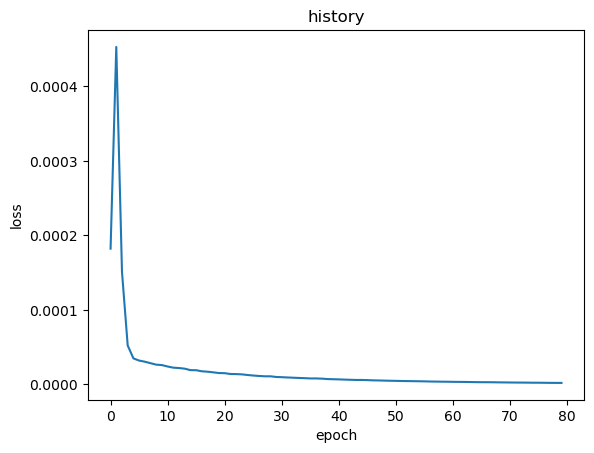

In [45]:
plt.plot(history.epoch, history.history['loss'])
plt.title('history')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# Predict and calculate the accuracy rate

In [46]:
predict = model.predict(x_valid.reshape((-1,64)))
result = tf.nn.softmax(predict)
res = tf.math.argmax(result,axis=1).numpy()
count = 0
for index in range(res.shape[0]):
    if y_valid[index] == res[index]:
        count+=1
print(f"accuracy rate = {count/4}%")

13/13 [==============================] - 0s 862us/step
accuracy rate = 93.25%
